# For the given ‘country’ dataset, perform the following tasks:

## Q1. Check for missing values, duplicate values and correlation And resolve them accordingly.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
country = pd.read_csv('Country.csv')

In [3]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
country.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [6]:
country.isnull().sum()# seems to be no missing values in the data

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
country.duplicated().sum()# no duplicate values in the data given

0

In [8]:
country.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<AxesSubplot:>

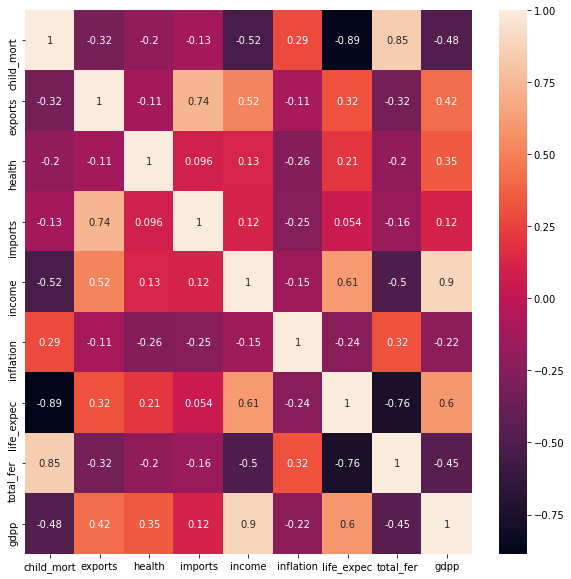

In [9]:
plt.figure(figsize = (10,10))
sns.heatmap(country.corr(),annot=True)

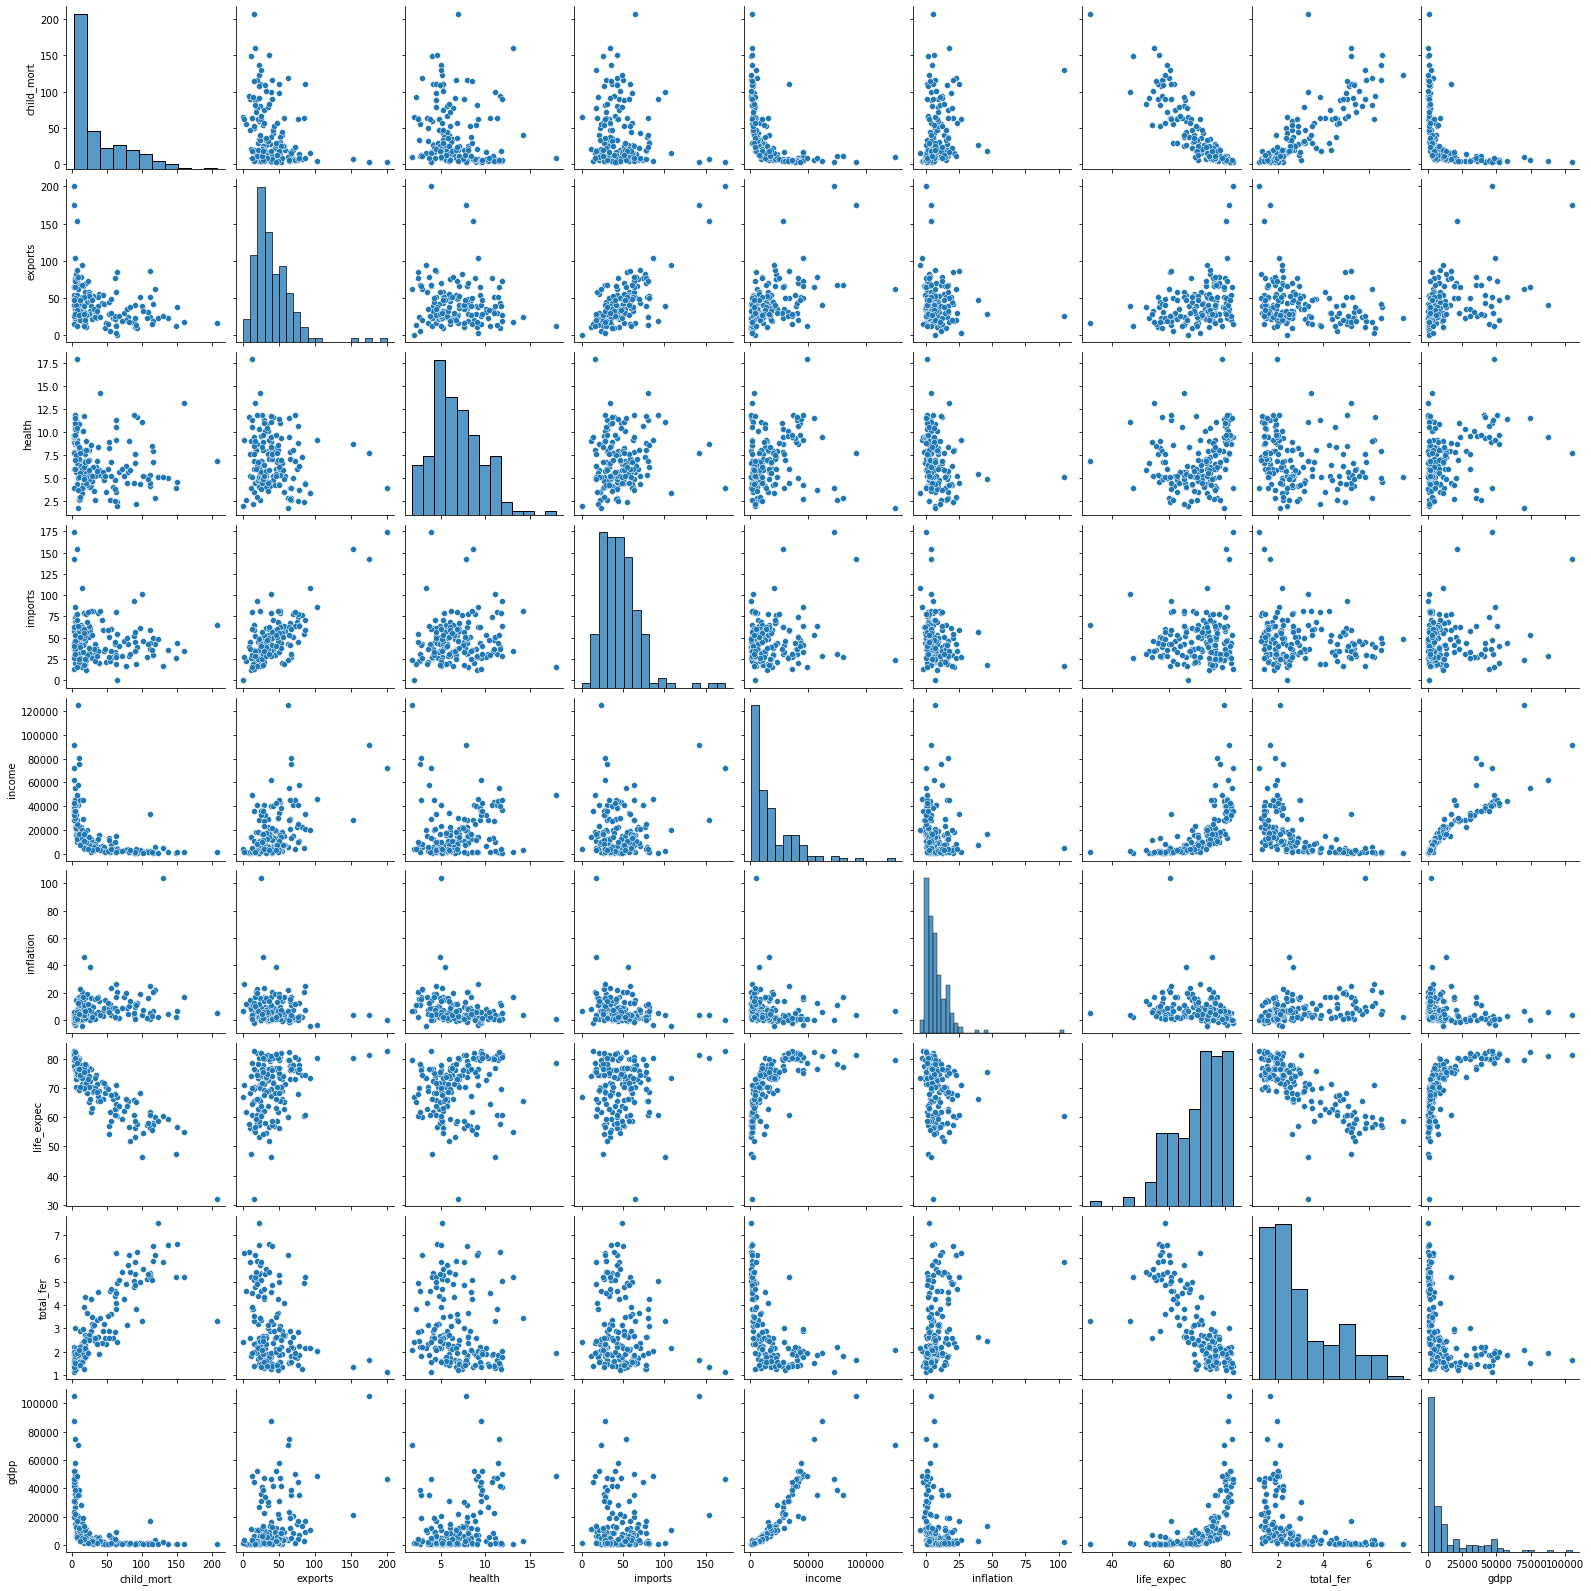

In [10]:
sns.pairplot(country)

## Q2. Which countries should be provided with the aid? (Hint: Use Kmeans algorithm).

In [11]:
X = country.drop('country', axis = 1).values

In [12]:
X

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.20e+01, 5.40e+00, 1.46e+03]])

In [13]:
from sklearn.cluster import KMeans

In [14]:
my_Cls = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
my_Cls.fit(X)

my_Cls.inertia_

22336241763.973694

In [15]:
kmeans = KMeans(n_clusters = 1, init = 'k-means++', random_state = 42)
kmeans.fit(X)
kmeans.inertia_ # 117459687469.0782 : K being 1


117459687469.0782

In [16]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(X)
kmeans.inertia_ # 36528387934.322105 : K being 2


36528387934.322105

In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(X)
kmeans.inertia_ # 22336241763.973694 : K being 3

22336241763.973694

In [18]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(X)
kmeans.inertia_ # 73679 : K being 4

14610713446.535133

In [19]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)# from the above inertias we seen that 4 clusters
# from the above inertias we seen that 4 clusters have less inertia
y_kmeans = kmeans.fit_predict(X)

In [20]:
y_kmeans

array([0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 2, 3, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 3, 2, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0])

In [21]:
centroids = kmeans.cluster_centers_
print(centroids)

[[5.41351852e+01 3.32573981e+01 6.32157407e+00 4.55385731e+01
  6.38113889e+03 9.20411111e+00 6.65666667e+01 3.51981481e+00
  3.02725926e+03]
 [5.04285714e+00 5.55285714e+01 9.37380952e+00 4.72095238e+01
  4.75714286e+04 2.76814286e+00 8.04571429e+01 1.77761905e+00
  4.60857143e+04]
 [1.21028571e+01 5.22942857e+01 6.84514286e+00 4.93371429e+01
  2.56000000e+04 6.59545714e+00 7.60628571e+01 1.97685714e+00
  1.73477143e+04]
 [5.00000000e+00 9.23333333e+01 6.35333333e+00 6.47666667e+01
  9.30000000e+04 5.51666667e+00 8.06000000e+01 1.88333333e+00
  8.77000000e+04]]


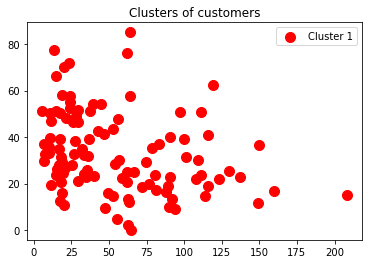

In [22]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

plt.title('Clusters of customers')
plt.legend()
plt.show()

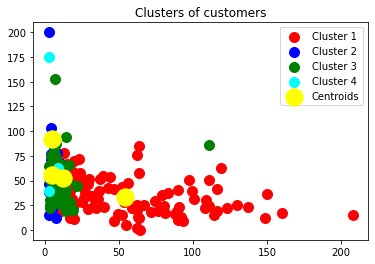

In [23]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.legend()
plt.show()

In [24]:
new_country = country.copy()
new_country['country_segment'] = y_kmeans

In [25]:
new_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_segment
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [26]:
cluster1 = new_country[new_country['country_segment']==0]
cluster1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_segment
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0
...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [27]:
cluster2 = new_country[new_country['country_segment']==1]
cluster3 = new_country[new_country['country_segment']==2]
cluster4 = new_country[new_country['country_segment']==3]


In [28]:
cluster1.mean()

child_mort           54.135185
exports              33.257398
health                6.321574
imports              45.538573
income             6381.138889
inflation             9.204111
life_expec           66.566667
total_fer             3.519815
gdpp               3027.259259
country_segment       0.000000
dtype: float64

In [29]:
cluster2.mean()

child_mort             5.042857
exports               55.528571
health                 9.373810
imports               47.209524
income             47571.428571
inflation              2.768143
life_expec            80.457143
total_fer              1.777619
gdpp               46085.714286
country_segment        1.000000
dtype: float64

In [30]:
cluster3.mean()

child_mort            12.102857
exports               52.294286
health                 6.845143
imports               49.337143
income             25600.000000
inflation              6.595457
life_expec            76.062857
total_fer              1.976857
gdpp               17347.714286
country_segment        2.000000
dtype: float64

In [31]:
cluster4.mean()

child_mort             5.000000
exports               92.333333
health                 6.353333
imports               64.766667
income             93000.000000
inflation              5.516667
life_expec            80.600000
total_fer              1.883333
gdpp               87700.000000
country_segment        3.000000
dtype: float64

**cluster 1 countries are provided with aid first as they don't have proper income and all other facilities and the have health issues as well**

## Q3. Remove the curse of dimensionality, if exist

In [32]:
country2 = country.drop('country',axis = 1)
#dropping the categorical data not suitable for our model

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X2):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X2.columns
    vif["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

    return(vif)

In [34]:
X2 = country.iloc[:,1:]
calc_vif(X2)

,variables,VIF
0,child_mort,8.084814
1,exports,16.084236
2,health,12.421525
3,imports,17.280234
4,income,13.414051
5,inflation,1.985961
6,life_expec,21.916807
7,total_fer,17.673828
8,gdpp,10.298641


In [35]:
X3 = country.iloc[:,1:]

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XXXX = sc.fit_transform(X3)
from sklearn.decomposition import PCA
pca=PCA(n_components = 9)
pca_analysis = pca.fit_transform(XXXX)
############################################   APPLYING PCA   #############################################################
explained_variance = pca.explained_variance_ratio_
#for i in explained_variance:
 #   print(i)
evr=[]
for i in explained_variance:
    evr.append(float(round(i*100,3)))
######################################### EXPLAINED VARIANCES VS. COLUMNS  ################################################
cols = list(X3.columns)
var=pd.DataFrame({'ExplainedVariance':evr,'COLUMNS':cols})
var['ExplainedVariance'].sum()

99.999

In [37]:
explained_variance

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

Text(0, 0.5, 'Cumulative Explained Variance')

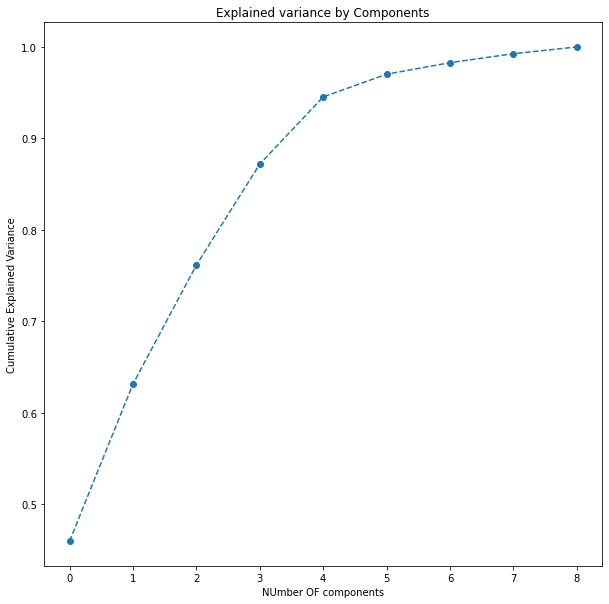

In [38]:
plt.figure(figsize=(10,10))
plt.plot(range(0,9), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained variance by Components')
plt.xlabel("NUmber OF components")
plt.ylabel("Cumulative Explained Variance")

**The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 to 85 % of the variance. So, in this instance, we decide to keep 4 
components.**

In [39]:
# Load in the data
dfd = pd.read_csv('Country.csv')

XXX = country.iloc[:,1:]
# Standardize the data to have a mean of ~0 and a variance of 1
XX = StandardScaler().fit_transform(XXX)

# Create a PCA instance: pca
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(XX)
# Plot the explained variances
features = range(pca.n_components_)
print(pca.explained_variance_ratio_)

s = 0
for i in range(0, 4):
  s = s+pca.explained_variance_ratio_[i]
print("sum is : " ,s)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]
sum is :  0.8719078614023908


In [40]:
pca.get_covariance()

array([[ 1.0060241 , -0.32000945, -0.2016093 , -0.12797725, -0.52747354,
         0.29001277, -0.89201752,  0.85358942, -0.485942  ],
       [-0.32000945,  1.0060241 , -0.11509761,  0.74182289,  0.51989676,
        -0.10794074,  0.3182181 , -0.32193832,  0.42124719],
       [-0.2016093 , -0.11509761,  1.0060241 ,  0.09629328,  0.1303592 ,
        -0.2569142 ,  0.21196135, -0.19785877,  0.34804965],
       [-0.12797725,  0.74182289,  0.09629328,  1.0060241 ,  0.12314364,
        -0.2484822 ,  0.05471819, -0.16000656,  0.11619394],
       [-0.52747354,  0.51989676,  0.1303592 ,  0.12314364,  1.0060241 ,
        -0.14864609,  0.61564899, -0.50486319,  0.90096644],
       [ 0.29001277, -0.10794074, -0.2569142 , -0.2484822 , -0.14864609,
         1.0060241 , -0.24114897,  0.31883023, -0.22296618],
       [-0.89201752,  0.3182181 ,  0.21196135,  0.05471819,  0.61564899,
        -0.24114897,  1.0060241 , -0.76545827,  0.60370413],
       [ 0.85358942, -0.32193832, -0.19785877, -0.16000656, -0

In [41]:
X3.shape

(167, 9)

### Q4. Build a Kmeans model by selecting optimal number of clusters using elbow method.

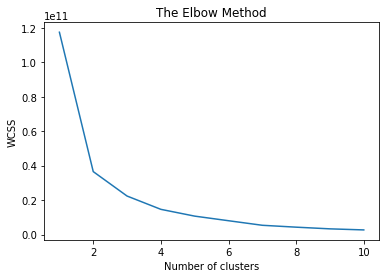

In [42]:
# Using the elbow method to find the optimal number of clusters


from sklearn.cluster import KMeans

wcss = [] # Within the cluster some of scatter

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
# from the above inertias we seen that 4 clusters have less inertia
y_kmeans = kmeans.fit_predict(X)

**seen from the figure optimized num of cluter is 4**

In [44]:
y_kmeans

array([0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 2, 3, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 3, 2, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0])

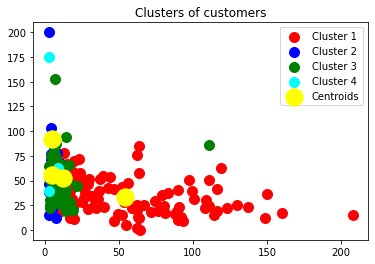

In [45]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.legend()
plt.show()

## Q5. Find optimal number of clusters using silhouette test.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7256314906273207
For n_clusters = 3 The average silhouette_score is : 0.7106457354531156
For n_clusters = 4 The average silhouette_score is : 0.5915166208351548
For n_clusters = 5 The average silhouette_score is : 0.5734773443272871
For n_clusters = 6 The average silhouette_score is : 0.589653373502461


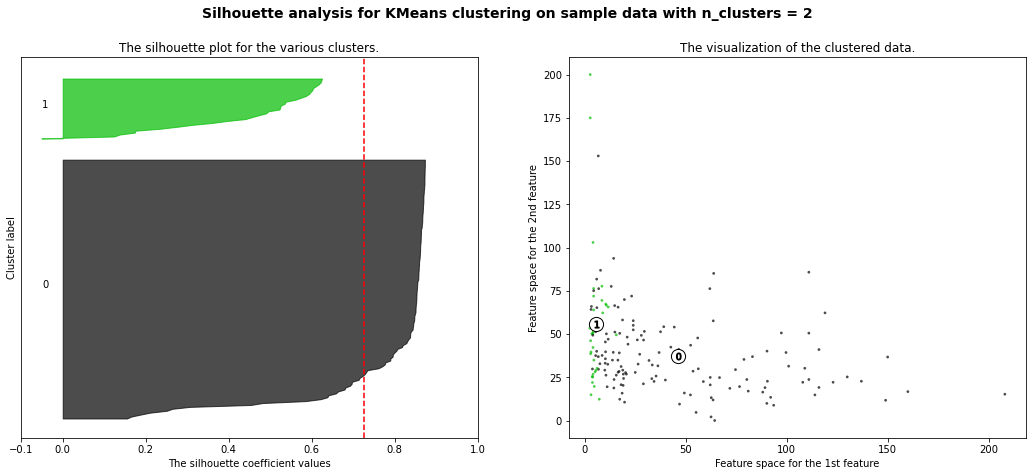

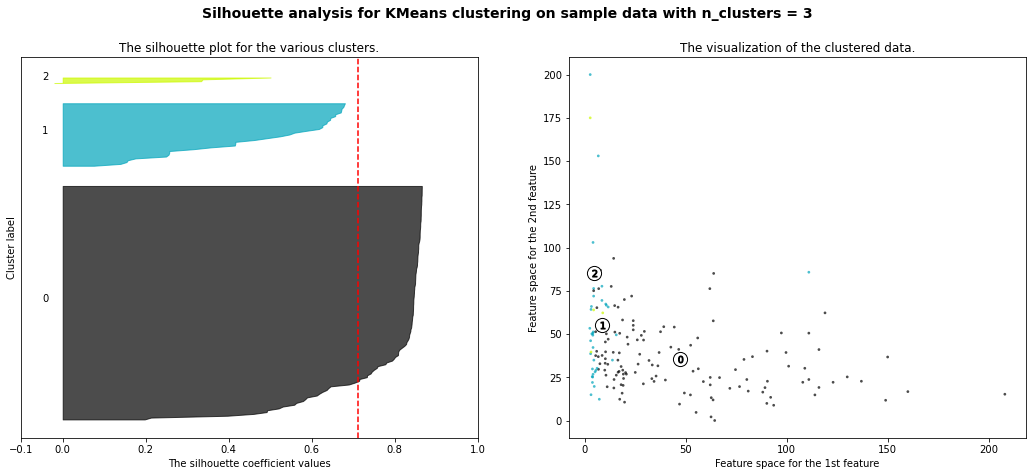

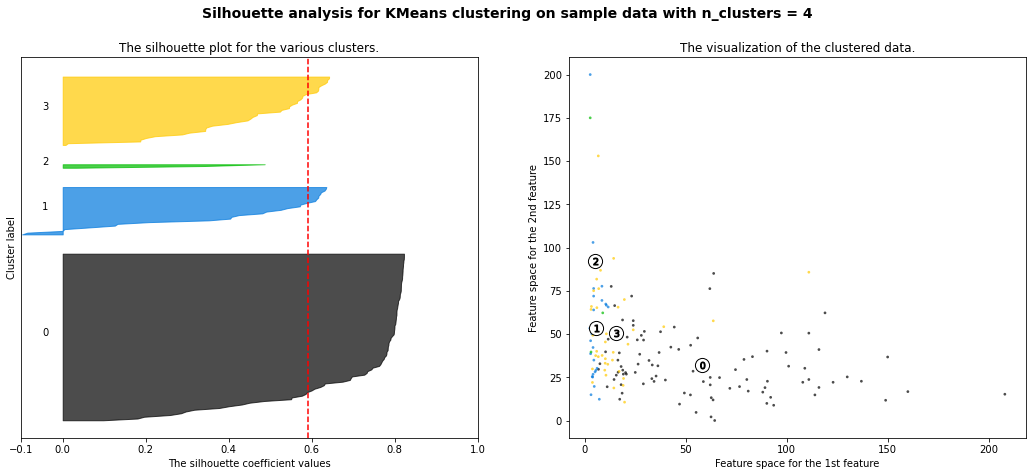

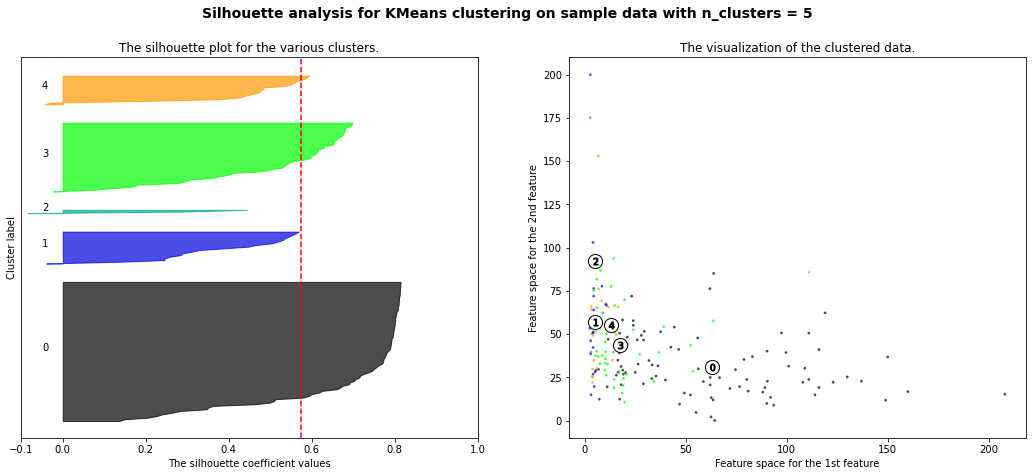

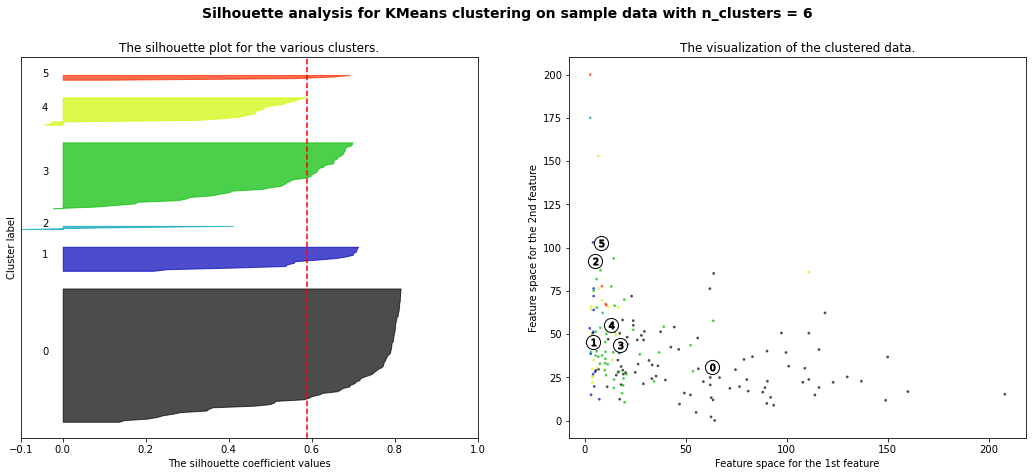

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = country.drop('country',axis = 1).values  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**num_of_cluter = 2 is the best as we have better score on num = 2 as comapred to otherss**